In [24]:
from data.read import read_csv
from data.train import preprocess_normalize_data, train_evaluate_linear_regression, train_evaluate_polynomial_regression
import matplotlib.pyplot as plt
import numpy as np

data = read_csv('data/train.csv')
x_train, y_train, keys = preprocess_normalize_data(data=data, target_column='medv')

LINEAR REGRESSION TRAIN SET:
MSE: 22.761376843762058
RMSE: 4.770888475301226
MAE: 3.303265347060312

LINEAR REGRESSION TEST SET:
MSE: 22.751637538646474
RMSE: 4.769867664689082
MAE: 3.5461145560533818


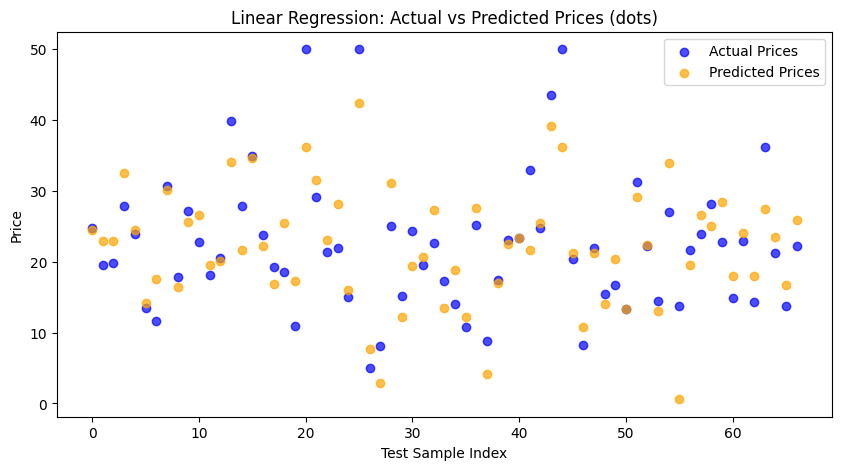

In [28]:
sgdr, X_test, y_test, y_test_pred = train_evaluate_linear_regression(x_train, y_train)
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, color='blue', label='Actual Prices', alpha=0.7)
plt.scatter(indices, y_test_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.title("Linear Regression: Actual vs Predicted Prices (dots)")
plt.legend()
plt.show()


POLYNOMIAL REGRESSION TRAIN SET:
MSE: 10.241011780537727
RMSE: 3.200158086804108
MAE: 2.282699228143423

POLYNOMIAL REGRESSION TEST SET:
MSE: 13.544680451099856
RMSE: 3.6803098308566162
MAE: 2.734549863484466


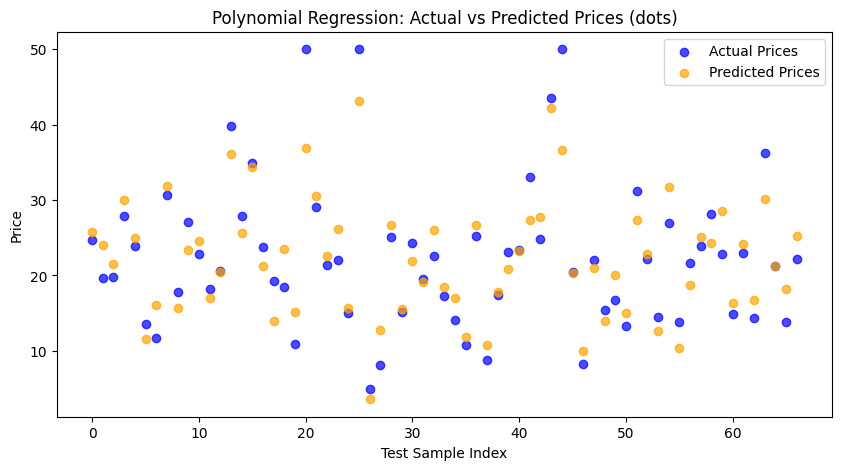

In [29]:

sgdr, X_test, y_test, y_test_pred = train_evaluate_polynomial_regression(x_train, y_train)
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, color='blue', label='Actual Prices', alpha=0.7)
plt.scatter(indices, y_test_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.title("Polynomial Regression: Actual vs Predicted Prices (dots)")
plt.legend()
plt.show()